In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.10.0


In [2]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [3]:
import numpy as np

data_x = np.load('x_train.npy')

In [4]:
data_x

array([[[ 1.7597e+01,  8.1713e+00, -1.7842e+00, -1.9706e+01,
         -9.7135e+00, -6.1887e+01],
        [ 2.2974e-01, -5.8956e+00,  1.6837e+01,  5.0390e+00,
          2.4332e+00,  5.8914e+01],
        [-2.9654e+01, -2.1296e+01,  2.9103e+01, -4.7503e-01,
          7.5391e+01,  1.0665e+01],
        ...,
        [ 1.1982e+02,  2.1849e+02,  1.6398e+03,  5.9787e+02,
          2.1922e+03,  1.8484e+01],
        [ 9.1591e+01,  1.0378e+02,  1.8238e+03,  1.2460e+03,
          1.1301e+04,  7.5107e+02],
        [ 4.3719e+01,  3.0689e+01,  9.5092e+02,  8.5927e+02,
          8.1331e+03,  9.8883e+02]],

       [[ 2.4209e+00, -5.6039e-01,  2.3654e+01, -3.8171e+00,
          1.3721e+00,  8.2510e+00],
        [ 1.6847e+00,  2.3989e+01,  1.7803e+01, -1.9575e+01,
         -8.2534e+00, -2.3959e+01],
        [ 5.0692e-01,  5.0281e+01,  5.1196e+01,  1.6036e+01,
          7.2974e-01, -1.8185e+01],
        ...,
        [-1.5618e+01, -7.4233e+00,  3.7833e+00,  1.6565e+00,
         -1.0438e+01, -5.5229e+00],
  

In [5]:
#questa è la time series, 2429 oggetti misurati 36 volte ciascuno su 6 attributi
print(data_x.shape)

(2429, 36, 6)


In [6]:
import numpy as np

data_y = np.load('y_train.npy')
data_y

array([ 0,  0,  0, ..., 11, 11, 11])

In [7]:
#questa è l'associazione di ogni time serie alla classe
print(data_y.shape)

(2429,)


In [8]:
##NON ESEGUITO
data_t = np.zeros((2429, 108, 2))
a = 0
b=0
for i in range(2429):
    for j in range(36):
        for k in range(6):
            data_t[i][a][b] = data_x [i][j][k]
            #print(i,j,k,a,b)
            if(k%2==1 and a<107):
                a = a+1
                b=0
            elif(a<107):
                b=1
            else:
                a=0
data_t

array([[[ 9.8883e+02,  8.1713e+00],
        [-1.7842e+00, -1.9706e+01],
        [-9.7135e+00, -6.1887e+01],
        ...,
        [ 4.3719e+01,  3.0689e+01],
        [ 9.5092e+02,  8.5927e+02],
        [ 8.1331e+03,  0.0000e+00]],

       [[-1.9564e-01,  0.0000e+00],
        [ 1.1487e+00,  2.3275e+01],
        [ 2.3654e+01, -3.8171e+00],
        ...,
        [-5.5260e+00,  1.9070e+01],
        [-4.6352e+00, -3.2769e+00],
        [-5.9048e+00,  0.0000e+00]],

       [[ 2.2734e+00,  0.0000e+00],
        [ 4.4831e+00, -1.2885e+01],
        [ 1.0488e+01, -6.6960e+01],
        ...,
        [ 6.0153e+00, -6.8815e+00],
        [ 1.0936e+01, -6.4854e+01],
        [ 1.2557e+01,  0.0000e+00]],

       ...,

       [[ 7.7363e+02,  0.0000e+00],
        [ 1.2328e-01,  8.2416e+01],
        [ 2.5118e+02,  4.6314e+02],
        ...,
        [-1.9275e+00,  1.0337e+02],
        [ 2.9050e+02,  5.0103e+02],
        [ 6.6608e+02,  0.0000e+00]],

       [[-7.0557e-01,  0.0000e+00],
        [ 5.2729e+00,  1.64

In [9]:
#NORMALIZZAZIONE A MEDIA E VARIANZA

import torch
  
# Step 2: creating a torch tensor
t = torch.tensor(data_t)
print("Tensor before Normalize:\n", t)
  
# Step 3: Computing the mean, std and variance
mean, std, var = torch.mean(t), torch.std(t), torch.var(t)
print("Mean, Std and Var before Normalize:\n", 
      mean, std, var)
  
# Step 4: Normalizing the tensor
t  = (t-mean)/std
print("Tensor after Normalize:\n", t)
  
# Step 5: Again compute the mean, std and variance
# after Normalize
mean, std, var = torch.mean(t), torch.std(t), torch.var(t)
print("Mean, std and Var after normalize:\n", 
      mean, std, var)

Tensor before Normalize:
 tensor([[[ 9.8883e+02,  8.1713e+00],
         [-1.7842e+00, -1.9706e+01],
         [-9.7135e+00, -6.1887e+01],
         ...,
         [ 4.3719e+01,  3.0689e+01],
         [ 9.5092e+02,  8.5927e+02],
         [ 8.1331e+03,  0.0000e+00]],

        [[-1.9564e-01,  0.0000e+00],
         [ 1.1487e+00,  2.3275e+01],
         [ 2.3654e+01, -3.8171e+00],
         ...,
         [-5.5260e+00,  1.9070e+01],
         [-4.6352e+00, -3.2769e+00],
         [-5.9048e+00,  0.0000e+00]],

        [[ 2.2734e+00,  0.0000e+00],
         [ 4.4831e+00, -1.2885e+01],
         [ 1.0488e+01, -6.6960e+01],
         ...,
         [ 6.0153e+00, -6.8815e+00],
         [ 1.0936e+01, -6.4854e+01],
         [ 1.2557e+01,  0.0000e+00]],

        ...,

        [[ 7.7363e+02,  0.0000e+00],
         [ 1.2328e-01,  8.2416e+01],
         [ 2.5118e+02,  4.6314e+02],
         ...,
         [-1.9275e+00,  1.0337e+02],
         [ 2.9050e+02,  5.0103e+02],
         [ 6.6608e+02,  0.0000e+00]],

        

In [10]:
t = np.array(t)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [12]:
Y_train = tfk.utils.to_categorical(y_train)
Y_test = tfk.utils.to_categorical(y_test)

input_shape = X_train.shape[1:]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1943, 36, 6), (1943, 12), (486, 36, 6), (486, 12))

In [13]:
input_shape = X_train.shape[1:]
classes = Y_train.shape[-1]
batch_size = 64
epochs = 200

In [17]:
def build_BiLSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(input_layer)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128))(bilstm)
    dropout = tfkl.Dropout(.5, seed=seed)(bilstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [18]:
# Encoder Summary Example
model = build_BiLSTM_classifier(input_shape, classes)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 36, 256)          138240    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 12)                1548  

In [ ]:
# Train the model
history = model.fit(
    x = X_train,
    y = Y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.15,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-4)
    ]
).history

Epoch 1/200
26/26 [==============================] - 14s 423ms/step - loss: 1.9432 - accuracy: 0.3683 - val_loss: 1.5554 - val_accuracy: 0.4692 - lr: 0.0010
Epoch 2/200
26/26 [==============================] - 14s 529ms/step - loss: 1.4217 - accuracy: 0.5106 - val_loss: 1.2623 - val_accuracy: 0.5616 - lr: 0.0010
Epoch 3/200
26/26 [==============================] - 15s 562ms/step - loss: 1.1523 - accuracy: 0.6021 - val_loss: 1.1201 - val_accuracy: 0.6027 - lr: 0.0010
Epoch 4/200
26/26 [==============================] - 14s 546ms/step - loss: 1.0044 - accuracy: 0.6554 - val_loss: 1.0849 - val_accuracy: 0.6062 - lr: 0.0010
Epoch 5/200
26/26 [==============================] - 14s 549ms/step - loss: 0.8674 - accuracy: 0.7032 - val_loss: 1.0778 - val_accuracy: 0.6473 - lr: 0.0010
Epoch 6/200
26/26 [==============================] - 15s 590ms/step - loss: 0.7521 - accuracy: 0.7450 - val_loss: 1.0836 - val_accuracy: 0.6438 - lr: 0.0010
Epoch 7/200
26/26 [==============================] - 16s 6

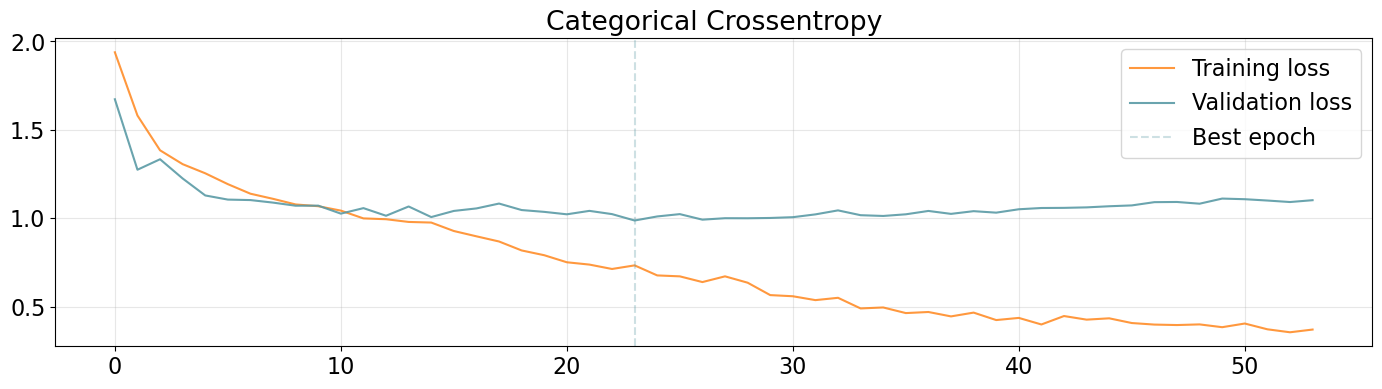

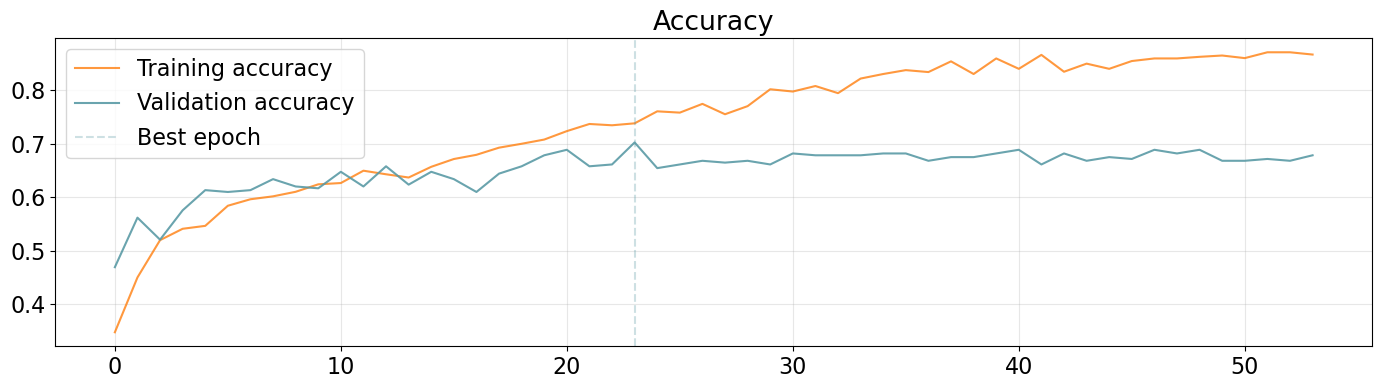

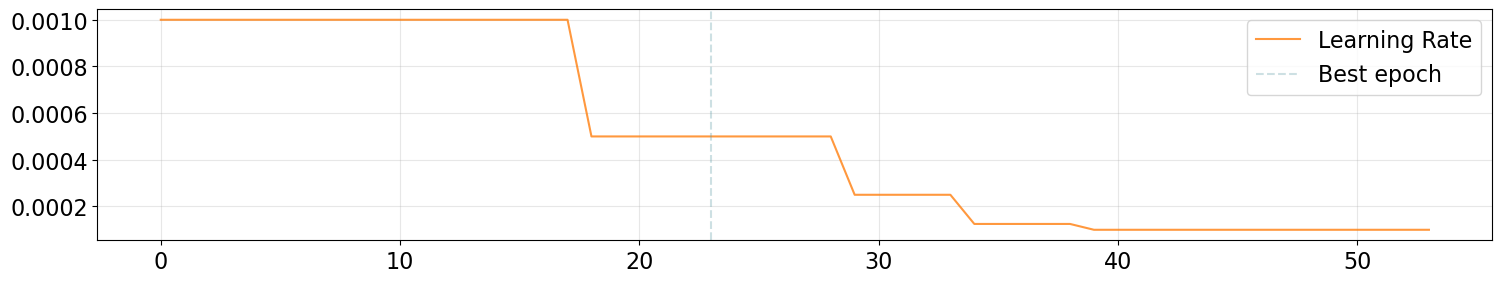

In [76]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [77]:
model.save('Handmade_Matte_New')

INFO:tensorflow:Assets written to: Handmade_Matte_New\assets


INFO:tensorflow:Assets written to: Handmade_Matte_New\assets


In [78]:
model = tfk.models.load_model('Handmade_Matte_New')

In [79]:
model_tuned = build_BiLSTM_classifier(input_shape, classes, model)
model_tuned.summary()
tfk.utils.plot_model(model_tuned, expand_nested=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 36, 128)           2432      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 18, 128)          0         
 1D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 18, 128)           0         
                                                                 
 bidirectional_14 (Bidirecti  (None, 18, 256)          263168    
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 256)              394240

In [80]:
# Train the model
history = model_tuned.fit(
    x = X_train,
    y = Y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.15,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
26/26 [==============================] - 44s 1s/step - loss: 1.2654 - accuracy: 0.5954 - val_loss: 1.1464 - val_accuracy: 0.6062 - lr: 0.0010
Epoch 2/200
26/26 [==============================] - 18s 661ms/step - loss: 0.9285 - accuracy: 0.6772 - val_loss: 0.9771 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 3/200
26/26 [==============================] - 15s 594ms/step - loss: 0.8298 - accuracy: 0.6996 - val_loss: 0.9479 - val_accuracy: 0.6712 - lr: 0.0010
Epoch 4/200
26/26 [==============================] - 30s 1s/step - loss: 0.7683 - accuracy: 0.7226 - val_loss: 0.9593 - val_accuracy: 0.6610 - lr: 0.0010
Epoch 5/200
26/26 [==============================] - 31s 1s/step - loss: 0.7266 - accuracy: 0.7462 - val_loss: 1.0055 - val_accuracy: 0.6986 - lr: 0.0010
Epoch 6/200
26/26 [==============================] - 30s 1s/step - loss: 0.7027 - accuracy: 0.7396 - val_loss: 1.0741 - val_accuracy: 0.6575 - lr: 0.0010
Epoch 7/200
26/26 [==============================] - 29s 1s/step - los

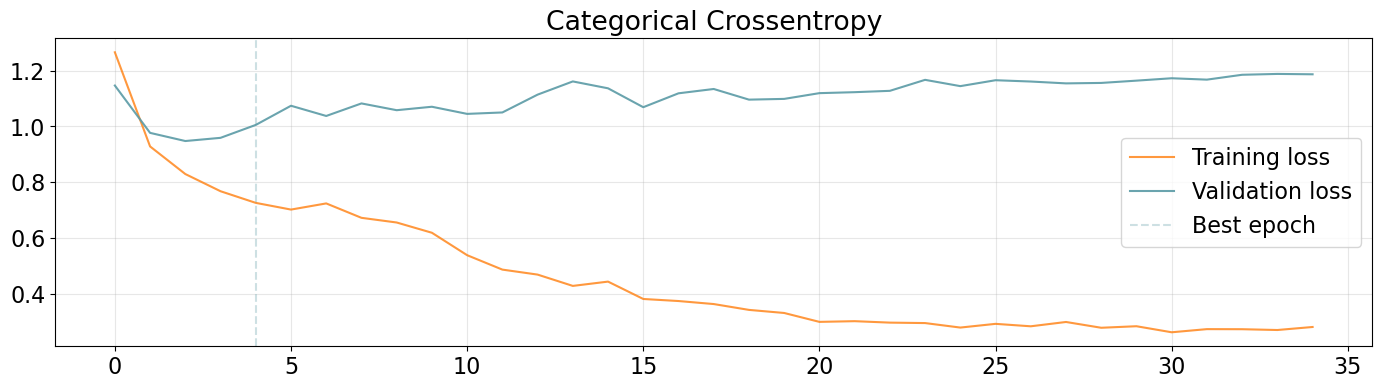

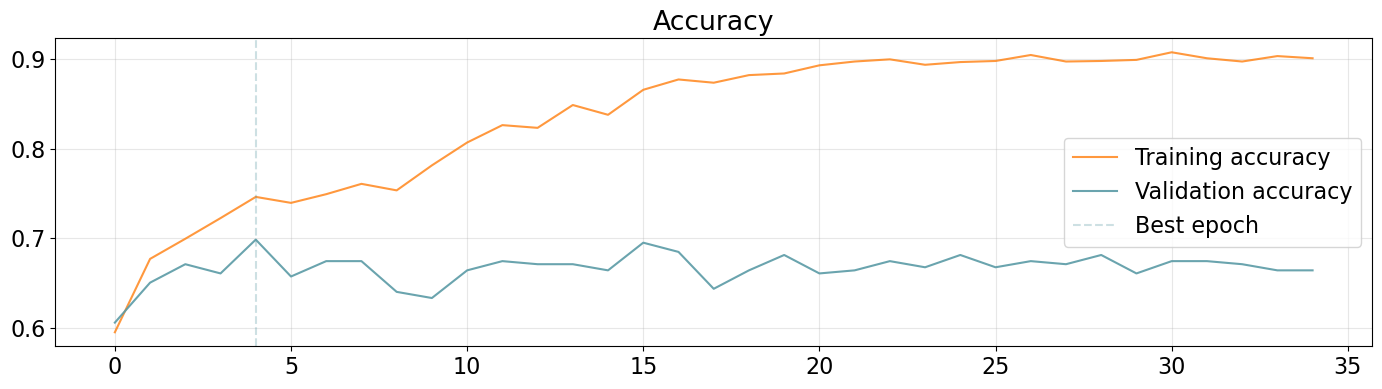

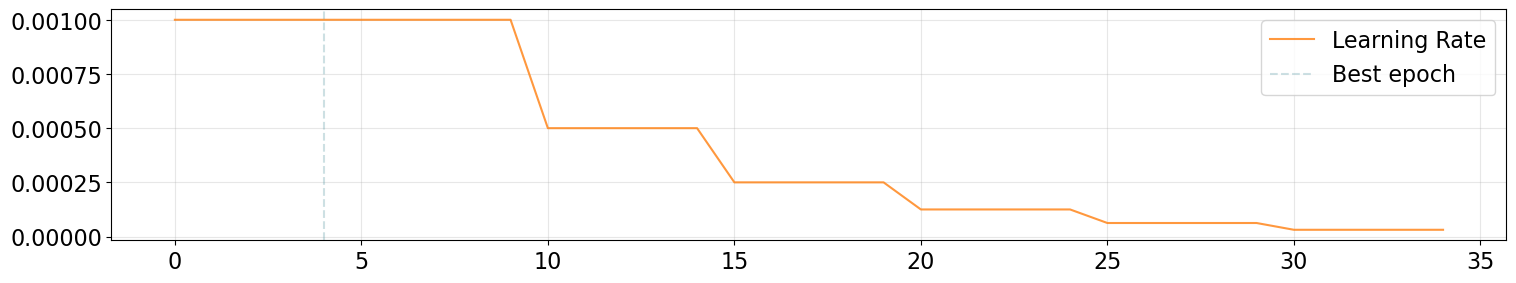

In [81]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [64]:
model_tuned.save('Handmade_Matte_Tuned_64')

INFO:tensorflow:Assets written to: Handmade_Matte_Tuned_64\assets


INFO:tensorflow:Assets written to: Handmade_Matte_Tuned_64\assets


In [71]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model_tuned.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model_tuned.predict(X_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
4/4 [==============================] - 2s 446ms/step - loss: 1.8245 - accuracy: 0.6667
test loss, test acc: [1.8245031833648682, 0.6666666865348816]
Generate predictions for 3 samples
16/16 [==============================] - 4s 189ms/step
predictions shape: (486, 12)


In [72]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
4/4 [==============================] - 3s 378ms/step - loss: 1.6994 - accuracy: 0.6461
test loss, test acc: [1.6993852853775024, 0.6460905075073242]
Generate predictions for 3 samples
16/16 [==============================] - 4s 185ms/step
predictions shape: (486, 12)
